In [72]:
from visual_behavior.data_access import loading
import pandas as pd
import visual_behavior.database as db
from visual_behavior.translator.foraging2 import data_to_change_detection_core
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [44]:
%matplotlib notebook

In [1]:
from allensdk.brain_observatory.behavior.behavior_session import BehaviorSession
behavior_session_id = 855964272
session = BehaviorSession.from_lims(behavior_session_id)
session.stimulus_presentations

,duration,end_frame,image_index,image_name,image_set,index,omitted,orientation,phase,spatial_frequency,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,,,,
0,2.635555,1276.0,1,gratings_90.0,grating,0,False,90.0,0.25,0.04,1197.0,5.275960,7.911514
1,5.838261,1451.0,0,gratings_0.0,grating,1,False,0.0,0.25,0.04,1276.0,7.911514,13.749776
2,6.672296,1651.0,3,gratings_270.0,grating,2,False,270.0,0.25,0.04,1451.0,13.749776,20.422072
3,6.372053,1842.0,2,gratings_180.0,grating,3,False,180.0,0.25,0.04,1651.0,20.422072,26.794125
4,7.573064,2069.0,3,gratings_270.0,grating,4,False,270.0,0.25,0.04,1842.0,26.794125,34.367189
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,6.505471,27611.0,2,gratings_180.0,grating,119,False,180.0,0.25,0.04,27416.0,879.978773,886.484244
120,5.838292,27786.0,3,gratings_270.0,grating,120,False,270.0,0.25,0.04,27611.0,886.484244,892.322536
121,6.005034,27966.0,0,gratings_0.0,grating,121,False,0.0,0.25,0.04,27786.0,892.322536,898.327570


In [5]:
session.stimulus_timestamps

array([-14.77429206, -14.75761597, -14.74092866, ..., 928.18605558,
       928.20272685, 928.21941673])

In [3]:
pkl_path = db.get_pkl_path(855964272)
data = pd.read_pickle(pkl_path)
core_data = data_to_change_detection_core(data)
core_data['visual_stimuli']

,orientation,image_name,image_category,frame,end_frame,time,duration
0,90,NaN,NaN,1197,1276,20.050252,2.635555
1,0,NaN,NaN,1276,1451,22.685806,5.838261
2,270,NaN,NaN,1451,1651,28.524068,6.672296
3,180,NaN,NaN,1651,1842,35.196364,6.372053
4,270,NaN,NaN,1842,2069,41.568417,7.573064
...,...,...,...,...,...,...,...
119,180,NaN,NaN,27416,27611,894.753065,6.505471
120,270,NaN,NaN,27611,27786,901.258536,5.838292
121,0,NaN,NaN,27786,27966,907.096828,6.005034
122,90,NaN,NaN,27966,28159,913.101862,6.438751


In [4]:
core_data['time']

array([0.00000000e+00, 1.66760851e-02, 3.33633954e-02, ...,
       9.42960348e+02, 9.42977019e+02, 9.42993709e+02])

In [7]:
events = [trial["events"] for trial
              in data["items"]["behavior"]["trial_log"]]
events

[[['trial_start', '', 25.114267231730103, 1196],
  ['initial_blank', 'enter', 25.11437755893365, 1196],
  ['initial_blank', 'exit', 25.114494621228108, 1196],
  ['pre_change', 'enter', 25.11463766173038, 1196],
  ['pre_change', 'exit', 27.398031364997667, 1264],
  ['stimulus_window', 'enter', 27.398185951370078, 1264],
  ['response_window', 'enter', 27.76503865621466, 1275],
  ['response_window', 'exit', 27.765177206656322, 1275],
  ['miss', '', 27.765376052197595, 1275],
  ['stimulus_changed', '', 27.765724031894823, 1275],
  ['auto_reward', '', 27.765790741366736, 1275],
  ['stimulus_window', 'exit', 31.268047958978805, 1380],
  ['no_lick', 'exit', 31.268268613385896, 1380],
  ['trial_end', '', 31.26837605412191, 1380]],
 [['trial_start', '', 31.269009152667834, 1380],
  ['initial_blank', 'enter', 31.269099916035866, 1380],
  ['initial_blank', 'exit', 31.26919003796667, 1380],
  ['pre_change', 'enter', 31.269272462650715, 1380],
  ['pre_change', 'exit', 33.53672260213124, 1448],
  ['

In [8]:
data.keys()

dict_keys(['comp_id', 'unpickleable', 'items', 'start_time', 'script', 'rig_id', 'threads', 'stop_time', 'session_uuid', 'platform_info'])

In [9]:
data['start_time']

datetime.datetime(2019, 4, 23, 13, 8, 44, 448000)

In [23]:
pkl_path = db.get_pkl_path(855964272)
data = pd.read_pickle(pkl_path)
data['items']['behavior']['stimuli']['grating']['set_log']

[('Ori', 90, 5.112622586672602, 0),
 ('Ori', 0, 27.765477078561307, 1275),
 ('Ori', 270, 33.60379352392144, 1450),
 ('Ori', 180, 40.27627054282908, 1650),
 ('Ori', 270, 46.64804595769465, 1841),
 ('Ori', 0, 54.22113933363652, 2068),
 ('Ori', 90, 63.529060313701294, 2347),
 ('Ori', 180, 69.73430547421775, 2533),
 ('Ori', 90, 76.03968347638452, 2722),
 ('Ori', 0, 85.31423657103052, 3000),
 ('Ori', 270, 91.61937724142221, 3189),
 ('Ori', 0, 98.79205182299668, 3404),
 ('Ori', 270, 105.6645187071961, 3610),
 ('Ori', 180, 113.30430038762051, 3839),
 ('Ori', 270, 119.30934048065457, 4019),
 ('Ori', 0, 125.4813601548173, 4204),
 ('Ori', 90, 131.48646214654403, 4384),
 ('Ori', 180, 142.8624056205296, 4725),
 ('Ori', 90, 150.50207857734353, 4954),
 ('Ori', 180, 158.710509756581, 5201),
 ('Ori', 270, 165.98174148925048, 5418),
 ('Ori', 180, 171.88668754758663, 5595),
 ('Ori', 90, 178.12528006753053, 5782),
 ('Ori', 180, 184.23181605632846, 5966),
 ('Ori', 270, 192.67075123204057, 6218),
 ('Ori', 

In [67]:
data['items']['behavior']['stimuli']['grating']['set_log'][0][2]

5.112622586672602

In [ ]:
events = [trial["events"] for trial
              in data["items"]["behavior"]["trial_log"]]

In [31]:
from itertools import chain
import scipy.stats as sps
trial_by_frame = list(chain(
        [event[i][-2:] for event in events for i in [0, -1]]))

In [32]:
times = [trials[0] for trials in trial_by_frame]
frames = [trials[1] for trials in trial_by_frame]

time_to_first_vsync = sps.linregress(frames, times).intercept

<IPython.core.display.Javascript object>


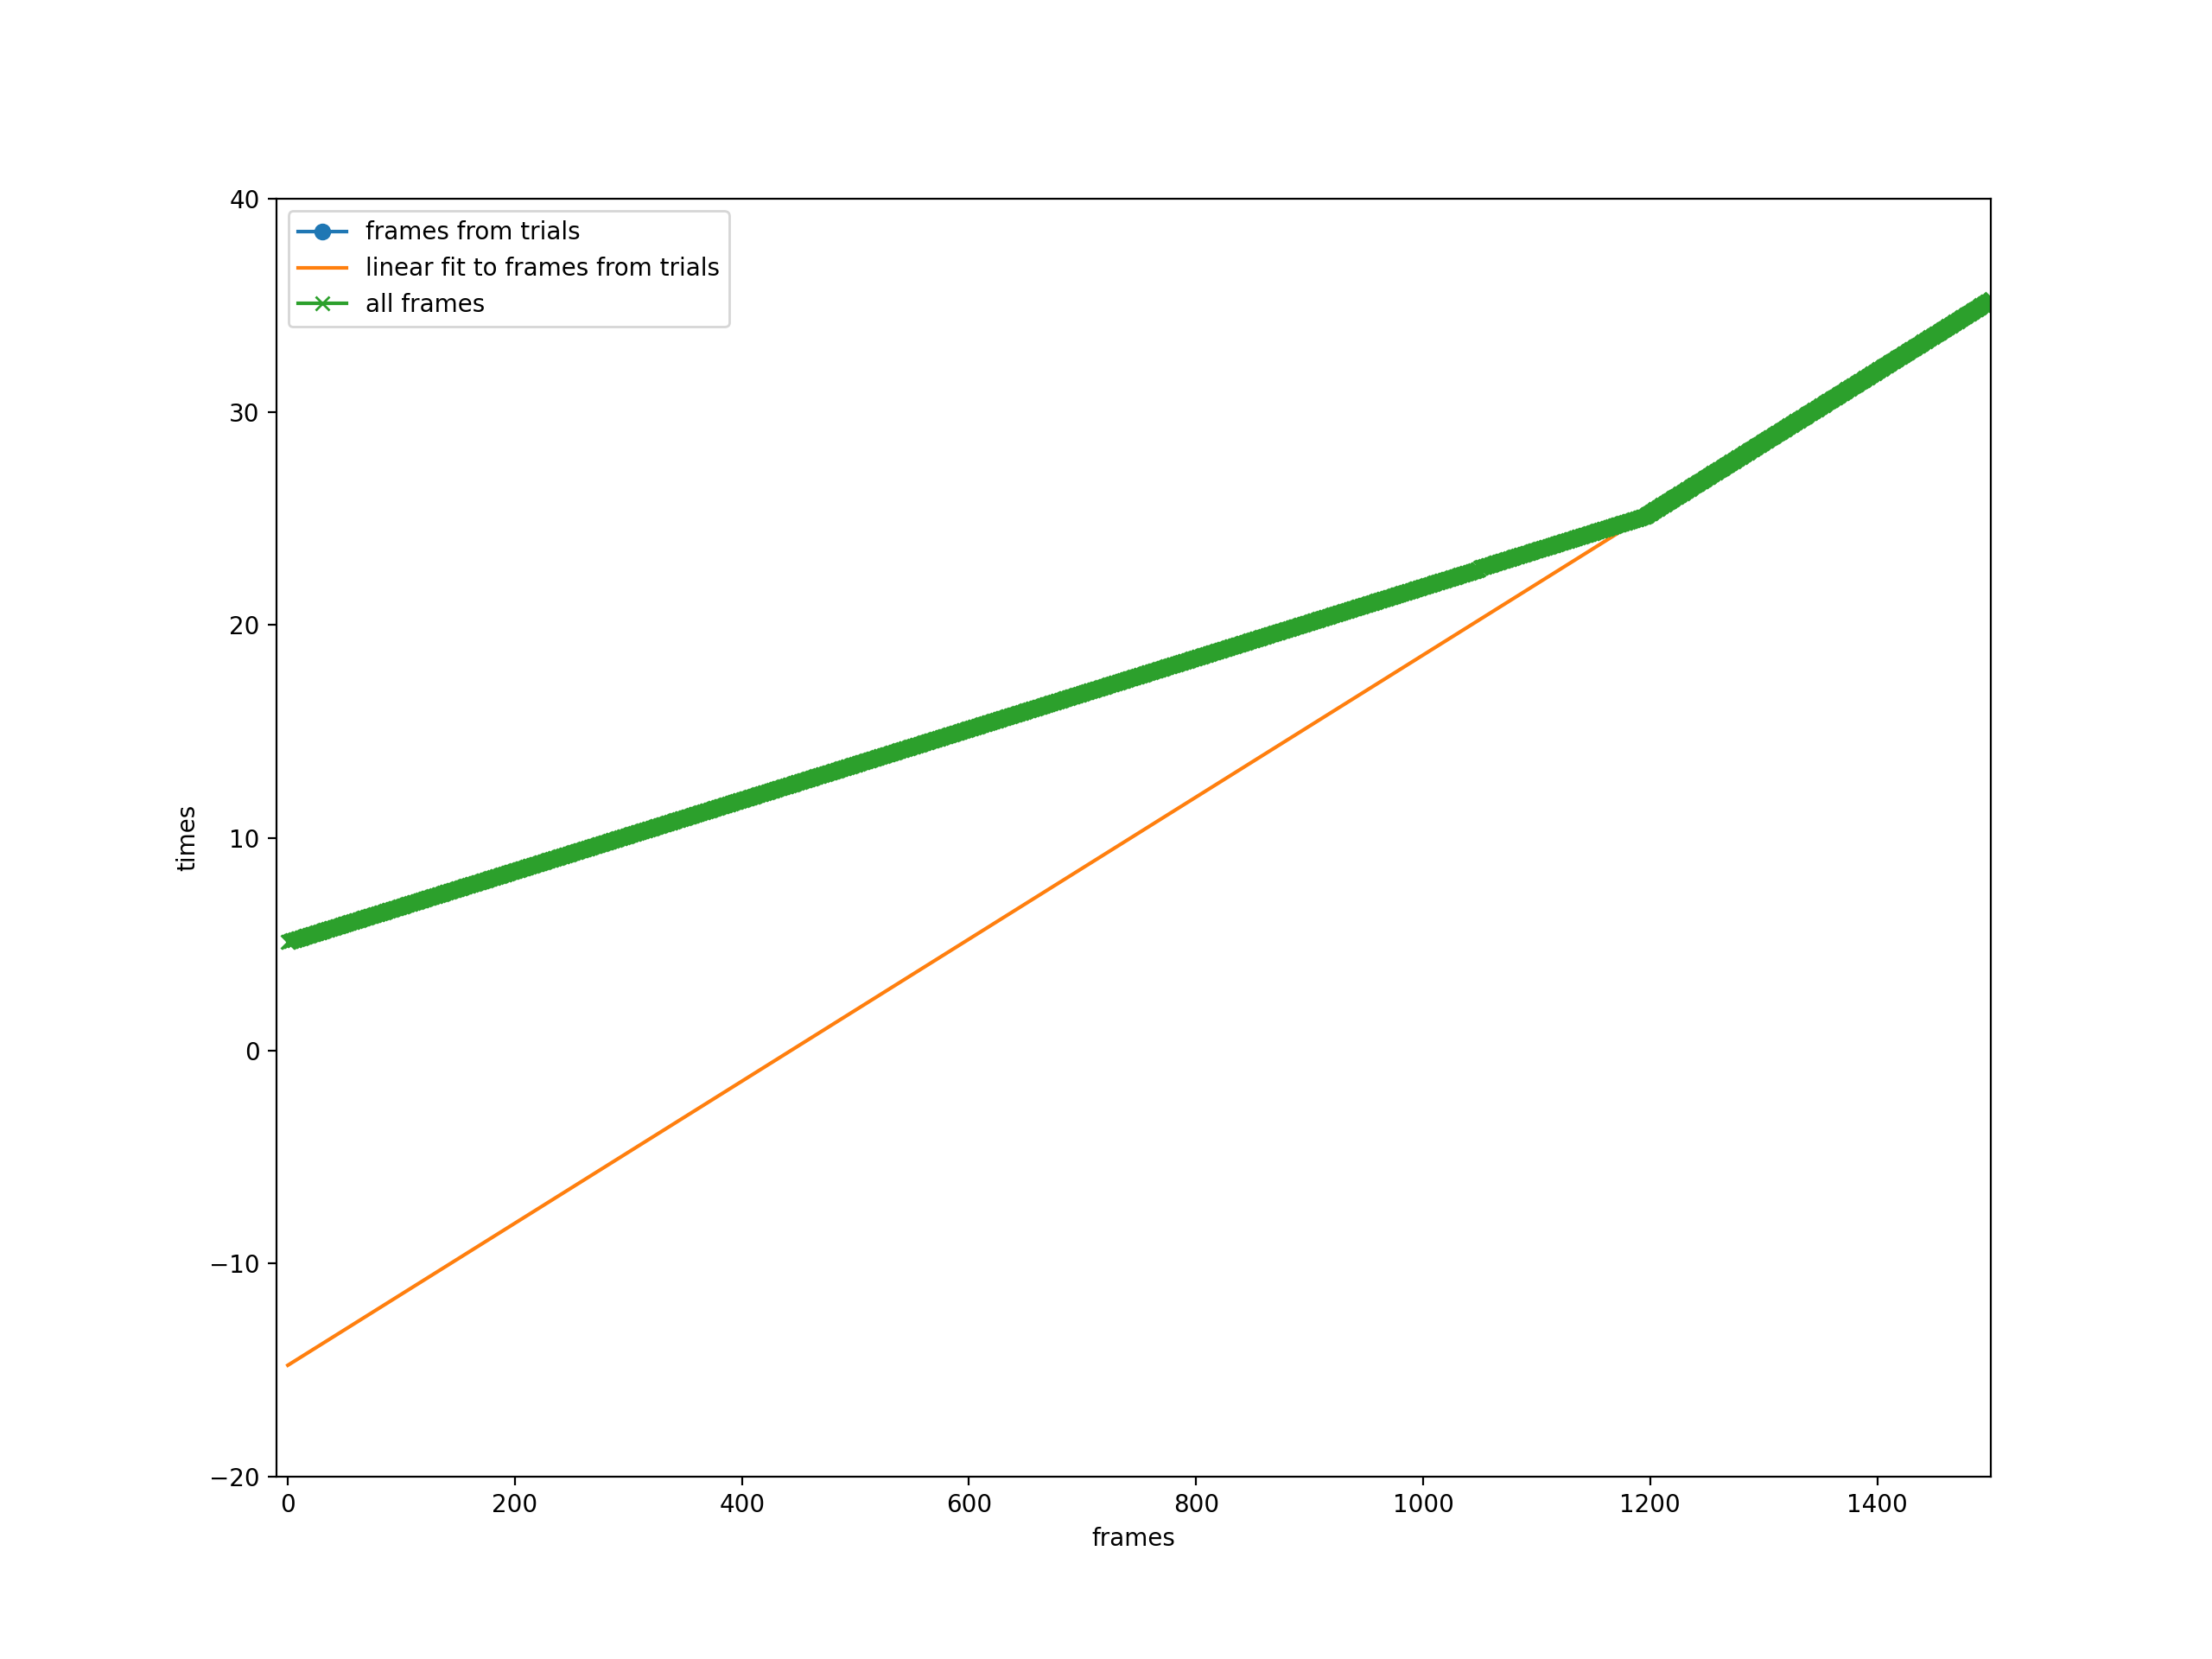

(-20.0, 40.0)

In [73]:
fig,ax = plt.subplots()
ax.plot(frames, times, marker = 'o')

linregress = sps.linregress(frames, times)

ax.plot(
    [0]+frames,
    linregress.slope*np.array([0]+frames) + linregress.intercept
)

ax.set_xlabel('frames')
ax.set_ylabel('times')

alternate_times = (
    np.hstack((0, data['items']['behavior']['intervalsms'])).cumsum() / 1000.0 + 
    data['items']['behavior']['stimuli']['grating']['set_log'][0][2]
)
alternate_frames = np.arange(len(alternate_times))

ax.plot(
    alternate_frames,
    alternate_times,
    marker = 'x'
)

ax.legend(['frames from trials','linear fit to frames from trials','all frames'])

ax.set_xlim(-10,1500)
ax.set_ylim(-20,40)

In [35]:
sps.linregress(frames, times)

LinregressResult(slope=0.03336145225988811, intercept=-14.774292055555463, rvalue=0.9999999993060623, pvalue=0.0, stderr=7.956558663088755e-08)

In [47]:
events[0]

[['trial_start', '', 25.114267231730103, 1196],
 ['initial_blank', 'enter', 25.11437755893365, 1196],
 ['initial_blank', 'exit', 25.114494621228108, 1196],
 ['pre_change', 'enter', 25.11463766173038, 1196],
 ['pre_change', 'exit', 27.398031364997667, 1264],
 ['stimulus_window', 'enter', 27.398185951370078, 1264],
 ['response_window', 'enter', 27.76503865621466, 1275],
 ['response_window', 'exit', 27.765177206656322, 1275],
 ['miss', '', 27.765376052197595, 1275],
 ['stimulus_changed', '', 27.765724031894823, 1275],
 ['auto_reward', '', 27.765790741366736, 1275],
 ['stimulus_window', 'exit', 31.268047958978805, 1380],
 ['no_lick', 'exit', 31.268268613385896, 1380],
 ['trial_end', '', 31.26837605412191, 1380]]

In [49]:
times

[25.114267231730103,
 31.26837605412191,
 31.269009152667834,
 37.13994107757606,
 37.14058508055489,
 43.778841743965195,
 43.779478049697275,
 50.18425348573027,
 50.18492731554029,
 57.72398923924903,
 57.724624582825264,
 67.03192401021424,
 67.03255646732295,
 73.27045046212345,
 73.27105918605464,
 79.54407539709776,
 79.5447219658255,
 88.85026481736037,
 88.8509559659756,
 95.15557578933662,
 95.15620535997778,
 102.32833087128343,
 102.328943443838,
 109.16761877332827,
 109.16824930612528,
 116.84047584379464,
 116.84110220724965,
 122.84549958017934,
 122.84611888782482,
 128.98399934829976,
 128.98462731534786,
 134.98902051893555,
 134.98963661939487,
 146.4005534961857,
 146.40122347737233,
 154.00510263316397,
 154.0057229029653,
 162.24516853442498,
 162.2457910492566,
 169.51793907500902,
 169.51856062768482,
 175.38951147499134,
 175.39013142407404,
 181.66143146980852,
 181.66205430535877,
 187.7665036988478,
 187.7671300623028,
 196.20698024822337,
 196.207764084518

In [57]:
data['items']['behavior']['intervalsms'][:1196].max()

59.665528970072046

In [58]:
data['items']['behavior']['intervalsms'][:1196].mean()

16.736529299552394

In [62]:
np.sort(data['items']['behavior']['intervalsms'][:1196])[::-1][:10]

array([59.66552897, 33.36980974, 23.77166375, 17.35248066, 16.77807362,
       16.77326285, 16.76203769, 16.75626475, 16.75562332, 16.75466118])

In [69]:
np.sort(data['items']['behavior']['intervalsms'][1196:1400])[::-1][:10]

array([33.47532616, 33.41471034, 33.41406889, 33.40861668, 33.40669237,
       33.40476807, 33.40316447, 33.400278  , 33.39963657, 33.39931584])

<IPython.core.display.Javascript object>


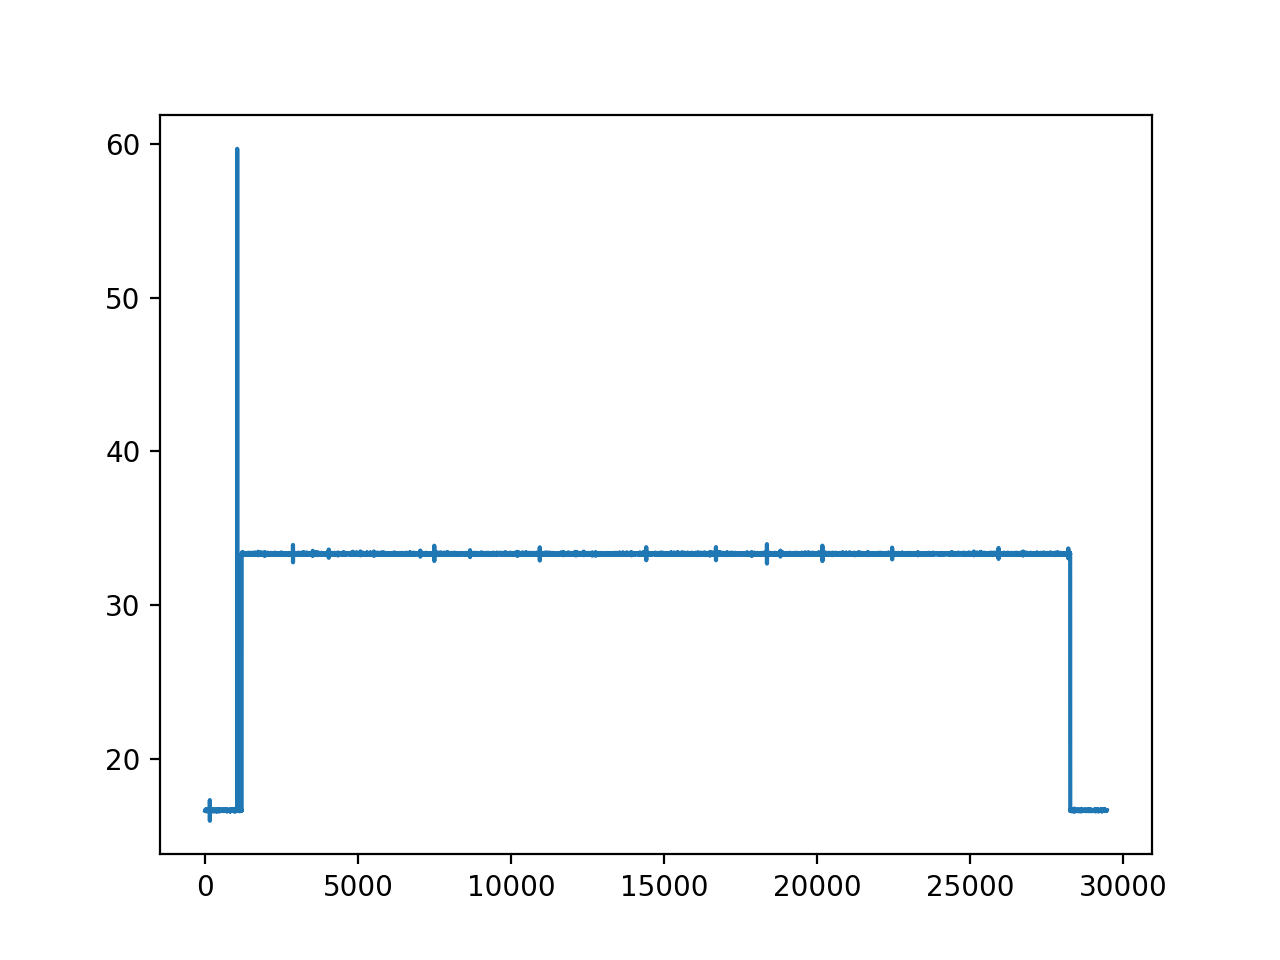

In [70]:
fig,ax = plt.subplots()
ax.plot(data['items']['behavior']['intervalsms'])


In [74]:
session.trials

OneResultExpectedError: Expected length one result, received: [135.89400792 144.10089452] results from query

In [75]:
session.licks

,time


In [76]:
core_data['licks']

,frame,time
